<a href="https://colab.research.google.com/github/percylinhai/clinicaltrial/blob/master/CLIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First try to document in a notebook about how to use pandas to deal with data from medical devices with CLIA-waiver.

In [0]:
import pandas as pd
clia_detail=pd.read_csv('clia_detail.txt',delimiter='|')
clia_detail.head()

,DOCUMENT_NUMBER,TEST_SYSTEM_ID,TEST_SYSTEM_NAME,QUALIFIER1,QUALIFIER2,ANALYTE_ID,ANALYTE_NAME,SPECIALTY_ID,COMPLEXITY,DATE_EFFECTIVE(2000-2018/3)
0,X140005,21528,"Carolina Liquid Chemistries Corp., Biolis 24i ...",NaN,NaN,12,Alanine aminotransferase (ALT) (SGPT),2,MODERATE,2014/03/18 00:00:00.000
1,X140003,22432,"RightBio Metrics, RightSpot Infant pH Indicator",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
2,X140003,22433,"RightBio Metrics, RightLevel pH Detector",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
3,X140003,22434,"RightBio Metrics, RightSpot pH Indicator",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
4,X140002,14778,"Vital Diagnostics, Envoy 500 Chemistry Analyzer",NaN,NaN,7,"Protein, total",2,MODERATE,2014/02/25 00:00:00.000


Have an idea about the number of analytes

In [0]:
unique_analyte=clia_detail['ANALYTE_NAME'].unique()
len(unique_analyte)

1051

In [0]:
clia_detail['SPECIALTY_ID']=clia_detail['SPECIALTY_ID'].astype(object)

In [0]:
clia_detail.dtypes

DOCUMENT_NUMBER                object
TEST_SYSTEM_ID                  int64
TEST_SYSTEM_NAME               object
QUALIFIER1                     object
QUALIFIER2                     object
ANALYTE_ID                      int64
ANALYTE_NAME                   object
SPECIALTY_ID                   object
COMPLEXITY                     object
DATE_EFFECTIVE(2000-2018/3)    object
dtype: object

In [0]:
clia_detail.head()

,DOCUMENT_NUMBER,TEST_SYSTEM_ID,TEST_SYSTEM_NAME,QUALIFIER1,QUALIFIER2,ANALYTE_ID,ANALYTE_NAME,SPECIALTY_ID,COMPLEXITY,DATE_EFFECTIVE(2000-2018/3)
0,X140005,21528,"Carolina Liquid Chemistries Corp., Biolis 24i ...",NaN,NaN,12,Alanine aminotransferase (ALT) (SGPT),2,MODERATE,2014/03/18 00:00:00.000
1,X140003,22432,"RightBio Metrics, RightSpot Infant pH Indicator",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
2,X140003,22433,"RightBio Metrics, RightLevel pH Detector",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
3,X140003,22434,"RightBio Metrics, RightSpot pH Indicator",NaN,NaN,335,Gastric pH,2,WAIVED,2014/03/18 00:00:00.000
4,X140002,14778,"Vital Diagnostics, Envoy 500 Chemistry Analyzer",NaN,NaN,7,"Protein, total",2,MODERATE,2014/02/25 00:00:00.000


How many devices are categorized in different complexity?

In [0]:
clia_detail['ANALYTE_NAME'].value_counts()
clia_detail['COMPLEXITY'].value_counts()

MODERATE    41510
WAIVED      11183
HIGH        10383
Name: COMPLEXITY, dtype: int64

For each unique analyte, how are the devices categorized?

In [0]:
clia_detail[['ANALYTE_NAME','COMPLEXITY']].groupby(['ANALYTE_NAME'])['COMPLEXITY'].value_counts()

ANALYTE_NAME                                   COMPLEXITY
1,25-Dihydroxyvitamin D (1,25-(OH)2D)          HIGH            5
                                               MODERATE        1
1,5-Anhydroglucitol                            MODERATE        8
1-Methylhistidine                              HIGH            2
17 Ketosteroid                                 HIGH            1
17 OH progesterone                             HIGH            2
17 OH progesterone, neonatal                   HIGH            2
17 alpha-OH Progesterone                       HIGH           10
21-hydroxylase antibody (21-OHAb)              HIGH            2
25-hydroxyvitamin D (25-OH-D)                  MODERATE       43
                                               HIGH           11
2�-deoxyadenosine (D-ADO)                      HIGH            1
3-Methylhistidine                              HIGH            2
5'Nucleotidase                                 MODERATE       33
                                

Create a new dataframe for unique analytes, we will use it as output, since we care about analytes.

In [0]:
clia_analyte=pd.DataFrame()
unique_analyte
clia_analyte['ANALYTE_NAME']=sorted(unique_analyte)
clia_analyte.head()

,ANALYTE_NAME
0,"1,25-Dihydroxyvitamin D (1,25-(OH)2D)"
1,"1,5-Anhydroglucitol"
2,1-Methylhistidine
3,17 Ketosteroid
4,17 OH progesterone


Curious about the percentage of different complexity for each analyte?

In [0]:
clia_group_analyte=clia_detail[['ANALYTE_NAME','COMPLEXITY']].groupby(['ANALYTE_NAME','COMPLEXITY']).agg({'COMPLEXITY':'count'})

In [0]:
clia_group_analyte.groupby(level=0).apply(lambda x: x/x.sum())

COMPLEXITY
ANALYTE_NAME                                  COMPLEXITY            
1,25-Dihydroxyvitamin D (1,25-(OH)2D)         HIGH          0.833333
                                              MODERATE      0.166667
1,5-Anhydroglucitol                           MODERATE      1.000000
1-Methylhistidine                             HIGH          1.000000
17 Ketosteroid                                HIGH          1.000000
17 OH progesterone                            HIGH          1.000000
17 OH progesterone, neonatal                  HIGH          1.000000
17 alpha-OH Progesterone                      HIGH          1.000000
21-hydroxylase antibody (21-OHAb)             HIGH          1.000000
25-hydroxyvitamin D (25-OH-D)                 HIGH          0.203704
                                              MODERATE      0.796296
2�-deoxyadenosine (D-ADO)                     HIGH          1.000000
3-Methylhistidine                             HIGH          1.000000
5'Nucleotidase                                HIGH          0.153846
                                              MODERATE      0.846154
5-Hydroxyindolacetic acid, urine (5-HIAA)     HIGH          0.600000
                                              MODERATE      0.400000
6-Acetylmorphine                              MODERATE      1.000000
ABH secretor status, saliva                   HIGH          1.000000
ABO group - RBC                               HIGH          0.413793
                                              MODERATE      0.586207
ABO group confirmation - serum, plasma        HIGH          0.227273
                                              MODERATE      0.772727
ABO reverse typing                            HIGH          1.000000
ABO/Rh type                                   HIGH          1.000000
ABO/Rh type + K                               HIGH          1.000000
AFP-L3%                                       MODERATE      1.000000
APTT factor substitution                      MODERATE      1.000000
Acanthamoeba                                  HIGH          1.000000
Acetaminophen                                 HIGH          0.033333
...                                                              ...
Zinc transporter 8 (ZnT8Ab) autoantibody      HIGH          1.000000
Zonisamide                                    MODERATE      1.000000
hCG beta serum, quantitative - extended range MODERATE      1.000000
hCG, Intact, serum, quantitative              HIGH          0.086957
                                              MODERATE      0.913043
hCG, Urine                                    HIGH          0.038462
                                              MODERATE      0.275641
                                              WAIVED        0.685897
hCG, beta, serum, quantitative                HIGH          0.253846
                                              MODERATE      0.746154
hCG, beta, whole blood, quantitative          MODERATE      1.000000
hCG, blood, qualitative                       MODERATE      1.000000
hCG, hyperglycosylated                        MODERATE      1.000000
hCG, serum, qualitative                       HIGH          0.038793
                                              MODERATE      0.961207
hCG, total, serum, quantitative               HIGH          0.022727
                                              MODERATE      0.977273
hCG, urine, quantitative                      HIGH          0.222222
                                              MODERATE      0.777778
hCG, whole blood, qualitative                 MODERATE      1.000000
lamotrigine                                   MODERATE      1.000000
pH                                            HIGH          0.020202
                                              MODERATE      0.969697
                                              WAIVED        0.010101
pH, urine                                     MODERATE      0.800000
                                              WAIVED    

Get the counts for waived, moderate and high in each analyte, and merge them together with analyte df.

In [0]:
clia_waived=clia_detail.loc[clia_detail['COMPLEXITY']=='WAIVED'][['ANALYTE_NAME','COMPLEXITY']].groupby(['ANALYTE_NAME']).count()
clia_moderate=clia_detail.loc[clia_detail['COMPLEXITY']=='MODERATE'][['ANALYTE_NAME','COMPLEXITY']].groupby(['ANALYTE_NAME']).count()
clia_high=clia_detail.loc[clia_detail['COMPLEXITY']=='HIGH'][['ANALYTE_NAME','COMPLEXITY']].groupby(['ANALYTE_NAME']).count()

In [0]:
clia_analyte_tmp=pd.merge(left=clia_analyte,right=clia_waived,how='left',on='ANALYTE_NAME')
clia_analyte_tmp.columns=['ANALYTE_NAME','WAIVED_COUNT']
clia_analyte_tmp2=pd.merge(left=clia_analyte_tmp,right=clia_moderate,how='left',on='ANALYTE_NAME')
clia_analyte_tmp2.columns=['ANALYTE_NAME','WAIVED_COUNT','MODERATE_COUNT']
clia_analyte_tmp3=pd.merge(left=clia_analyte_tmp2,right=clia_high,how='left',on='ANALYTE_NAME')
clia_analyte_tmp3.columns=['ANALYTE_NAME','WAIVED_COUNT','MODERATE_COUNT','HIGH_COUNT']
clia_analyte_tmp3=clia_analyte_tmp3.fillna(0)

Then, using existing column values, we can compute the total and the percentage of different complexity categories.

In [0]:
clia_analyte_tmp3['COMPLEXITY_TOTAL']=clia_analyte_tmp3['WAIVED_COUNT']+clia_analyte_tmp3['MODERATE_COUNT']+clia_analyte_tmp3['HIGH_COUNT']
clia_analyte_tmp3['WAIVED_PERCENT']=clia_analyte_tmp3['WAIVED_COUNT']/clia_analyte_tmp3['COMPLEXITY_TOTAL']
clia_analyte_tmp3

,ANALYTE_NAME,WAIVED_COUNT,MODERATE_COUNT,HIGH_COUNT,COMPLEXITY_TOTAL,WAIVED_PERCENT
0,"1,25-Dihydroxyvitamin D (1,25-(OH)2D)",0.0,1.0,5.0,6.0,0.000000
1,"1,5-Anhydroglucitol",0.0,8.0,0.0,8.0,0.000000
2,1-Methylhistidine,0.0,0.0,2.0,2.0,0.000000
3,17 Ketosteroid,0.0,0.0,1.0,1.0,0.000000
4,17 OH progesterone,0.0,0.0,2.0,2.0,0.000000
5,"17 OH progesterone, neonatal",0.0,0.0,2.0,2.0,0.000000
6,17 alpha-OH Progesterone,0.0,0.0,10.0,10.0,0.000000
7,21-hydroxylase antibody (21-OHAb),0.0,0.0,2.0,2.0,0.000000
8,25-hydroxyvitamin D (25-OH-D),0.0,43.0,11.0,54.0,0.000000
9,2�-deoxyadenosine (D-ADO),0.0,0.0,1.0,1.0,0.000000


Then, we can sort the df by particular columns. Here we are interested in analytes that have high percentage of waived devices and have high number of approved devices.

In [0]:
clia_analyte_complex=clia_analyte_tmp3.sort_values(by=['WAIVED_PERCENT','COMPLEXITY_TOTAL','ANALYTE_NAME'],ascending=[False,False,True])
clia_analyte_complex

,ANALYTE_NAME,WAIVED_COUNT,MODERATE_COUNT,HIGH_COUNT,COMPLEXITY_TOTAL,WAIVED_PERCENT
448,Glucose monitoring devices (FDA cleared/home use),1194.0,0.0,0.0,1194.0,1.000000
979,Urine hCG by visual color comparison tests,684.0,0.0,0.0,684.0,1.000000
978,"Urine dipstick or tablet analytes, nonautomated",161.0,0.0,0.0,161.0,1.000000
757,Ovulation test (LH) By visual color comparison,71.0,0.0,0.0,71.0,1.000000
469,"HGB, single analyte inst. w/self-cont.",8.0,0.0,0.0,8.0,1.000000
58,"Alcohol, saliva",7.0,0.0,0.0,7.0,1.000000
438,Gastric pH,7.0,0.0,0.0,7.0,1.000000
892,Spun microhematocrit,5.0,0.0,0.0,5.0,1.000000
372,"Erythrocyte sedimentation rate, nonautomated, ...",4.0,0.0,0.0,4.0,1.000000
405,"Fern test, saliva",4.0,0.0,0.0,4.0,1.000000


In [0]:
clia_combined=clia_analyte_complex.merge(clia_detail,how='inner',on='ANALYTE_NAME')\
[['ANALYTE_NAME','COMPLEXITY_TOTAL','WAIVED_PERCENT','SPECIALTY_ID']]
clia_combined=clia_combined.drop_duplicates()
clia_combined['SPECIALTY_ID']=clia_combined['SPECIALTY_ID'].astype(object)

In [0]:
clia_combined.head()

,ANALYTE_NAME,COMPLEXITY_TOTAL,WAIVED_PERCENT,SPECIALTY_ID
0,Glucose monitoring devices (FDA cleared/home use),1194.0,1.0,2
1194,Urine hCG by visual color comparison tests,684.0,1.0,6
1878,"Urine dipstick or tablet analytes, nonautomated",161.0,1.0,1
2039,Ovulation test (LH) By visual color comparison,71.0,1.0,6
2110,"HGB, single analyte inst. w/self-cont.",8.0,1.0,4


In [0]:
clia_analyte_complex.to_csv("clia_analyte_complex.csv",index=False)

In [0]:
clia_analyte_complex=pd.read_csv('clia_analyte_complex.csv')
clia_analyte_complex.head()

,ANALYTE_NAME,WAIVED_COUNT,MODERATE_COUNT,HIGH_COUNT,COMPLEXITY_TOTAL,WAIVED_PERCENT
0,Glucose monitoring devices (FDA cleared/home use),1194.0,0.0,0.0,1194.0,1.0
1,Urine hCG by visual color comparison tests,684.0,0.0,0.0,684.0,1.0
2,"Urine dipstick or tablet analytes, nonautomated",161.0,0.0,0.0,161.0,1.0
3,Ovulation test (LH) By visual color comparison,71.0,0.0,0.0,71.0,1.0
4,"HGB, single analyte inst. w/self-cont.",8.0,0.0,0.0,8.0,1.0


In [0]:
import matplotlib.pyplot as plt

Text(0.5,1,'FDA Cleared Diagnostic Tests by Analytes')

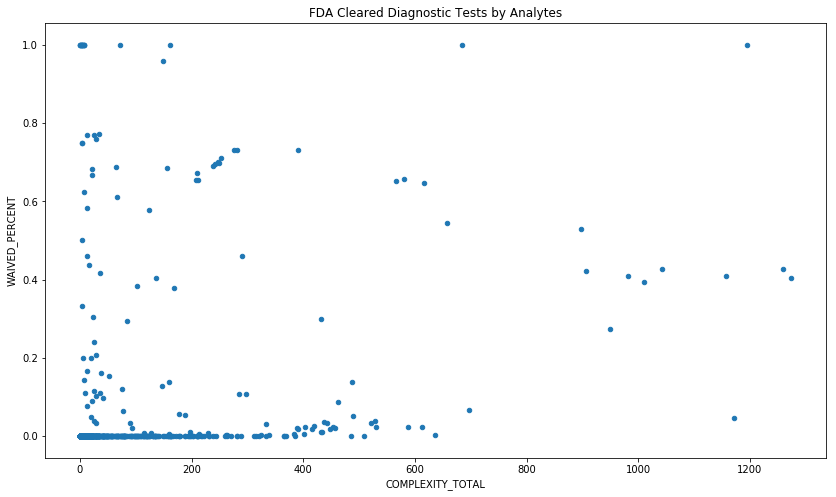

In [0]:
clia_analyte_complex.plot(kind='scatter',x='COMPLEXITY_TOTAL',y='WAIVED_PERCENT',figsize=(14,8))
plt.title('FDA Cleared Diagnostic Tests by Analytes')

In [0]:
clia_analyte_nonzero=clia_analyte_complex[clia_analyte_complex['WAIVED_COUNT']>0]
clia_analyte_nonzero

,ANALYTE_NAME,WAIVED_COUNT,MODERATE_COUNT,HIGH_COUNT,COMPLEXITY_TOTAL,WAIVED_PERCENT
0,Glucose monitoring devices (FDA cleared/home use),1194.0,0.0,0.0,1194.0,1.000000
1,Urine hCG by visual color comparison tests,684.0,0.0,0.0,684.0,1.000000
2,"Urine dipstick or tablet analytes, nonautomated",161.0,0.0,0.0,161.0,1.000000
3,Ovulation test (LH) By visual color comparison,71.0,0.0,0.0,71.0,1.000000
4,"HGB, single analyte inst. w/self-cont.",8.0,0.0,0.0,8.0,1.000000
5,"Alcohol, saliva",7.0,0.0,0.0,7.0,1.000000
6,Gastric pH,7.0,0.0,0.0,7.0,1.000000
7,Spun microhematocrit,5.0,0.0,0.0,5.0,1.000000
8,"Erythrocyte sedimentation rate, nonautomated, ...",4.0,0.0,0.0,4.0,1.000000
9,"Fern test, saliva",4.0,0.0,0.0,4.0,1.000000


Text(0,0.5,'Proportion of waived tests')

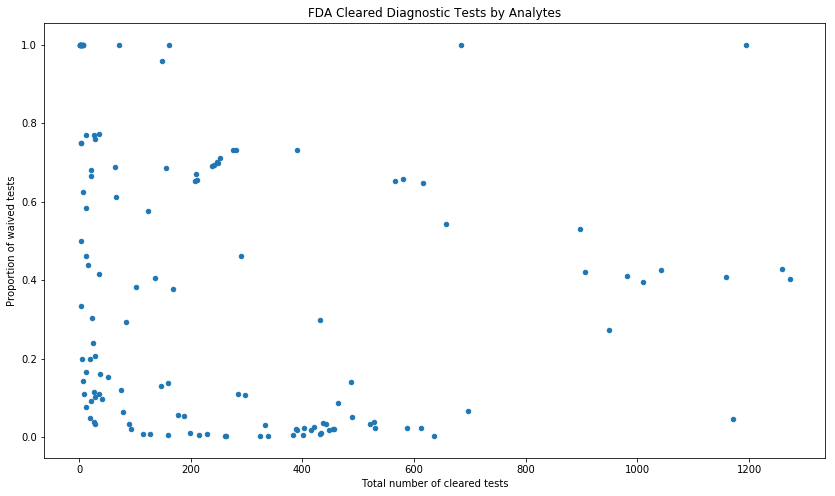

In [0]:
clia_analyte_complex_nozero=clia_analyte_complex[clia_analyte_complex['WAIVED_COUNT']>0]
clia_analyte_complex_nozero.plot(kind='scatter',x='COMPLEXITY_TOTAL',y='WAIVED_PERCENT',figsize=(14,8))
plt.title('FDA Cleared Diagnostic Tests by Analytes')
plt.xlabel('Total number of cleared tests')
plt.ylabel('Proportion of waived tests')

Text(0,0.5,'Proportion of waived tests')

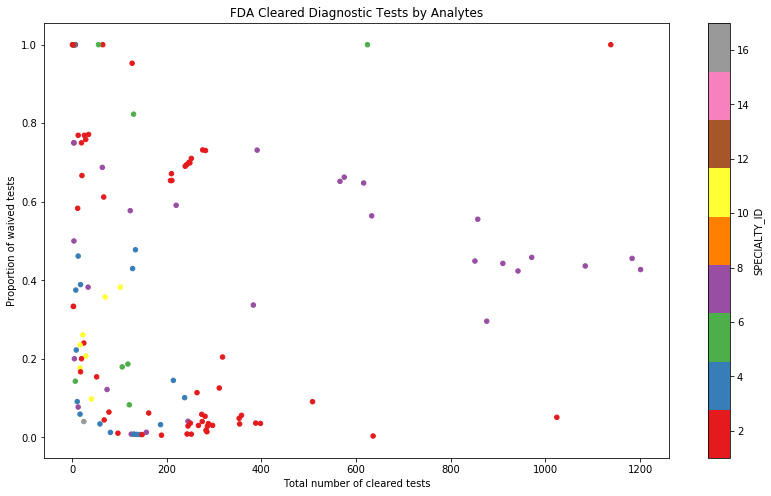

In [0]:
clia_combined_nonzero=clia_combined[clia_combined['WAIVED_PERCENT']>0]
#clia_combined_nonzero['SPECIALTY_ID']=clia_combined_nonzero['SPECIALTY_ID'].apply(str)+'C'
#plt.scatter(clia_combined_nonzero['COMPLEXITY_TOTAL'],clia_combined_nonzero['WAIVED_PERCENT'],\c=clia_combined_nonzero['SPECIALTY_ID'])
#clia_combined_nonzero.head()
clia_combined_nonzero.plot(kind='scatter',x='COMPLEXITY_TOTAL',y='WAIVED_PERCENT',\
                           c='SPECIALTY_ID',colormap='Set1',figsize=(14,8))
plt.title('FDA Cleared Diagnostic Tests by Analytes')
plt.xlabel('Total number of cleared tests')
plt.ylabel('Proportion of waived tests')

In [0]:
colors={}
for idx, id in enumerate(sorted(clia_combined_nonzero['SPECIALTY_ID'].unique())):
  colors[id]=idx+1
colors

{1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 6.0: 5,
 7.0: 6,
 8.0: 7,
 10.0: 8,
 11.0: 9,
 17.0: 10}

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Proportion of waived tests')

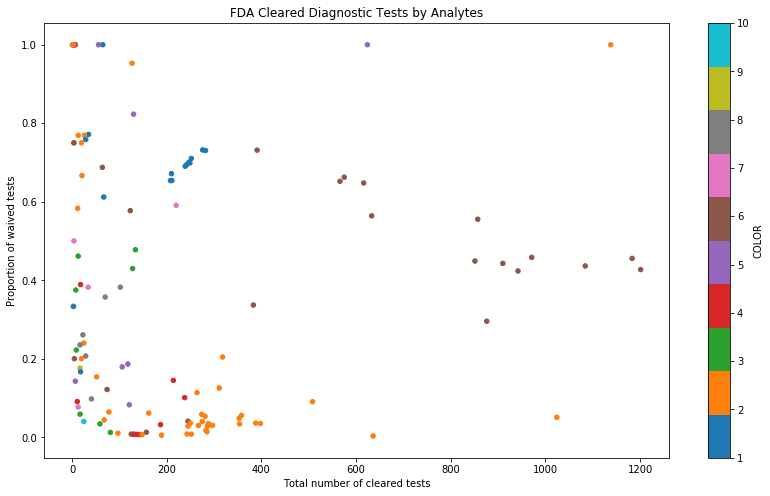

In [0]:
clia_combined_nonzero['COLOR']=clia_combined_nonzero['SPECIALTY_ID'].map(colors)
clia_combined_nonzero.plot(kind='scatter',x='COMPLEXITY_TOTAL',y='WAIVED_PERCENT',\
                           c='COLOR',colormap='tab10',figsize=(14,8))
plt.title('FDA Cleared Diagnostic Tests by Analytes')
plt.xlabel('Total number of cleared tests')
plt.ylabel('Proportion of waived tests')

In [0]:
#clia_combined_nonzero.loc['SPECIALTY_ID']=clia_combined_nonzero.loc['SPECIALTY_ID'].astype('int64')
clia_combined_nonzero

,ANALYTE_NAME,COMPLEXITY_TOTAL,WAIVED_PERCENT,SPECIALTY_ID,COLOR,COLOR_CODE
0,Glucose monitoring devices (FDA cleared/home use),1138.0,1.000000,2.0,2.0,"(0.5490196078431373, 0.33725490196078434, 0.29..."
1138,Urine hCG by visual color comparison tests,624.0,1.000000,6.0,5.0,"(0.7372549019607844, 0.7411764705882353, 0.133..."
1762,"Urine dipstick or tablet analytes, nonautomated",65.0,1.000000,1.0,1.0,"(1.0, 0.4980392156862745, 0.054901960784313725..."
1827,Ovulation test (LH) By visual color comparison,56.0,1.000000,6.0,5.0,"(0.7372549019607844, 0.7411764705882353, 0.133..."
1883,"Alcohol, saliva",7.0,1.000000,7.0,6.0,"(0.09019607843137255, 0.7450980392156863, 0.81..."
1890,Gastric pH,7.0,1.000000,2.0,2.0,"(0.5490196078431373, 0.33725490196078434, 0.29..."
1897,"HGB, single analyte inst. w/self-cont.",6.0,1.000000,4.0,4.0,"(0.4980392156862745, 0.4980392156862745, 0.498..."
1903,"Fern test, saliva",4.0,1.000000,6.0,5.0,"(0.7372549019607844, 0.7411764705882353, 0.133..."
1907,Amines,3.0,1.000000,2.0,2.0,"(0.5490196078431373, 0.33725490196078434, 0.29..."
1910,"Erythrocyte sedimentation rate, nonautomated, ...",3.0,1.000000,4.0,4.0,"(0.4980392156862745, 0.4980392156862745, 0.498..."


{1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 2: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 3: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 4: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 6: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), 7: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 8: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 10: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), 11: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0), 17: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


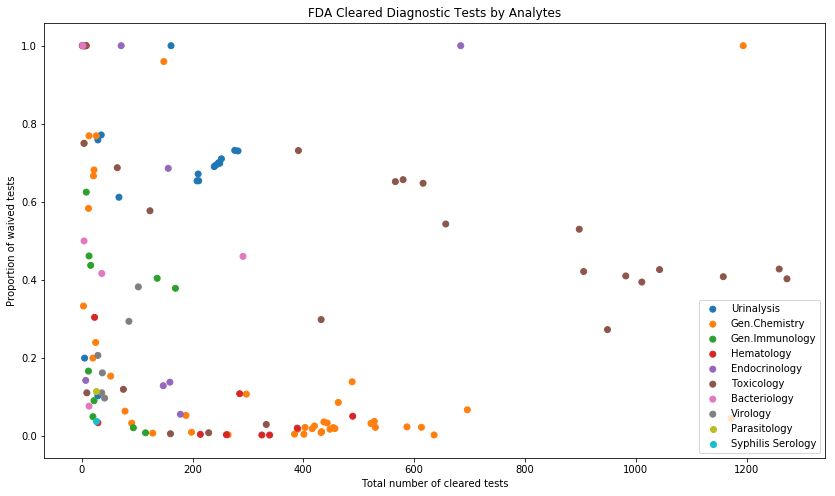

In [0]:
from matplotlib import cm
import numpy as np
clia_combined_nonzero=clia_combined[clia_combined['WAIVED_PERCENT']>0]
cmap = cm.get_cmap('tab10')
specialty_code={1.0:'Urinalysis',2.0:'Gen.Chemistry',3.0:'Gen.Immunology',4.0:'Hematology',\
             6.0:'Endocrinology',7.0:'Toxicology',8.0:'Bacteriology',10.0:'Virology',11.0:'Parasitology',17.0:'Syphilis Serology'}
colors_code={}
for idx, id in enumerate(sorted(clia_combined_nonzero['SPECIALTY_ID'].unique())):
  colors_code[id]=cmap(idx)
print(colors_code)
clia_combined_nonzero['COLOR_CODE']=clia_combined_nonzero['SPECIALTY_ID'].map(colors_code)

#fig = plt.figure(figsize=(14,8))
fig, ax = plt.subplots(figsize=(14,8))
for s in sorted(clia_combined_nonzero['SPECIALTY_ID'].unique()):
  ix = np.where(clia_combined_nonzero['SPECIALTY_ID'] == s)
  #print(np.array(clia_combined_nonzero['COMPLEXITY_TOTAL'])[ix])
  ax.scatter(np.array(clia_combined_nonzero['COMPLEXITY_TOTAL'])[ix], np.array(clia_combined_nonzero['WAIVED_PERCENT'])[ix], \
             c = np.array(clia_combined_nonzero['COLOR_CODE'])[ix], label = specialty_code[s])
ax.legend(loc='lower right')
ax.set_title('FDA Cleared Diagnostic Tests by Analytes')
ax.set_xlabel('Total number of cleared tests')
ax.set_ylabel('Proportion of waived tests')
plt.show()

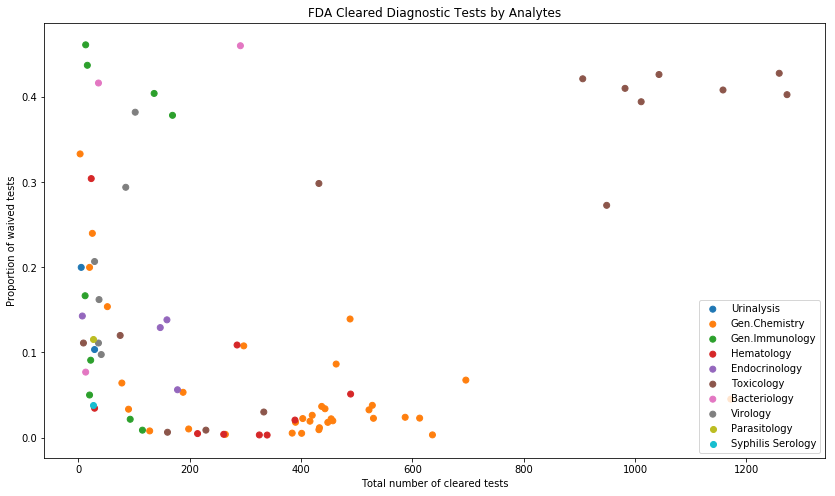

In [0]:
#WAVIED_PERCENTAGE less than 50%
clia_combined_small=clia_combined_nonzero[clia_combined_nonzero['WAIVED_PERCENT']<0.5]
fig, ax = plt.subplots(figsize=(14,8))
for s in sorted(clia_combined_small['SPECIALTY_ID'].unique()):
  ix = np.where(clia_combined_small['SPECIALTY_ID'] == s)
  ax.scatter(np.array(clia_combined_small['COMPLEXITY_TOTAL'])[ix], np.array(clia_combined_small['WAIVED_PERCENT'])[ix], \
             c = np.array(clia_combined_small['COLOR_CODE'])[ix], label = specialty_code[s])
ax.legend(loc='lower right')
ax.set_title('FDA Cleared Diagnostic Tests by Analytes')
ax.set_xlabel('Total number of cleared tests')
ax.set_ylabel('Proportion of waived tests')
plt.show()

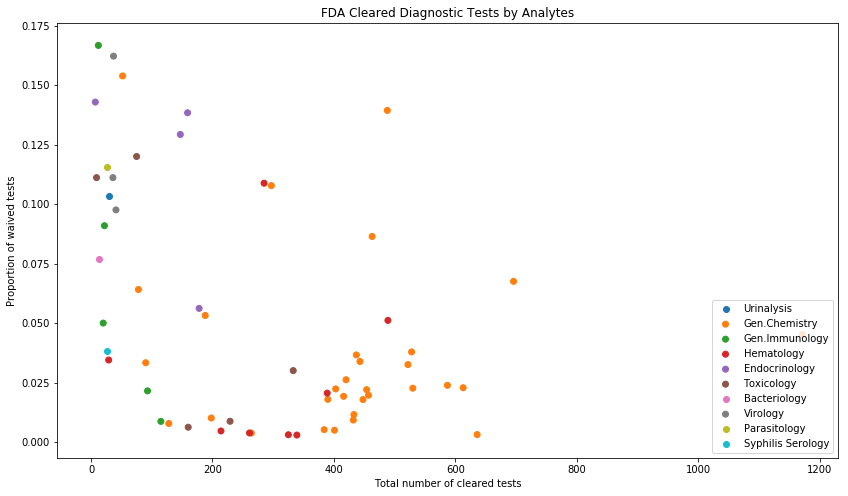

In [0]:
#WAVIED_PERCENTAGE less than 20%
clia_combined_small=clia_combined_nonzero[clia_combined_nonzero['WAIVED_PERCENT']<0.2]
fig, ax = plt.subplots(figsize=(14,8))
for s in sorted(clia_combined_small['SPECIALTY_ID'].unique()):
  ix = np.where(clia_combined_small['SPECIALTY_ID'] == s)
  ax.scatter(np.array(clia_combined_small['COMPLEXITY_TOTAL'])[ix], np.array(clia_combined_small['WAIVED_PERCENT'])[ix], \
             c = np.array(clia_combined_small['COLOR_CODE'])[ix], label = specialty_code[s])
ax.legend(loc='lower right')
ax.set_title('FDA Cleared Diagnostic Tests by Analytes')
ax.set_xlabel('Total number of cleared tests')
ax.set_ylabel('Proportion of waived tests')
plt.show()